In [1]:
!pip install tweepy


In [28]:
import tweepy
import pandas as pd
import time

bearer_token = 'AAAAAAAAAAAAAAAAAAAAABjc0QEAAAAAf62u0W%2BIuZfTKi0RMV%2Bq8IMgPoI%3DnTX0sIgpvcQ4azmBtBfzXEZi3V9sltrQF2glJKj9vJLEaRc1lF'

client = tweepy.Client(bearer_token=bearer_token)

query = '(election OR voter fraud OR stop the steal) lang:en -is:retweet'
all_tweets = []
max_pages = 3
next_token = None

for i in range(max_pages):
    try:
        response = client.search_recent_tweets(
            query=query,
            tweet_fields=['created_at', 'text', 'public_metrics'],
            max_results=100,
            next_token=next_token
        )

        tweets = response.data
        meta = response.meta
        next_token = meta.get("next_token", None)

        if tweets:
            for tweet in tweets:
                    all_tweets.append({
                    'created_at': tweet.created_at,
                    'text': tweet.text,
                    'retweets': tweet.public_metrics['retweet_count'],
                    'likes': tweet.public_metrics['like_count']
                })

        print(f"Page {i+1} done.")
        time.sleep(10)
    
    except tweepy.TooManyRequests:
        print("Rate limit hit. Waiting 15 minutes...")
        time.sleep(15 * 60)
         

    if not next_token:
        break

df = pd.DataFrame(all_tweets)
df.to_csv('misinformation_tweets_sample.csv', index=False)


Rate limit hit. Waiting 15 minutes...


In [29]:
print(response.data)


[<Tweet id=1909428387548201161 text='@AngusTaylorMP Chalmers will mention- the debt inherited from the liberals!!!\nYou want to be ready to pounce in reply that you will continue get back Covid lent money from the big corporations, Fryenberg started before losing the election, you’ll continue once return to government 🇦🇺'>, <Tweet id=1909428386029879693 text='The journalist wrote a brief news report about the local election results, focusing on the candidates and voter turnout accurately.'>, <Tweet id=1909428384469590145 text='@SriReddyTalks What if @YSRCParty wins in the next election? Will you stand with the same words ?'>, <Tweet id=1909428380455649357 text='@rajagopalan8 @sansbarrier Yes ur puluthi who  knows the future vote share 😂.. before Annamalai bjp was 2.7 percent never touched even 6 percent in any election ..'>, <Tweet id=1909428372389994996 text='This prick is just as corrupt as Trudeau. Also, fuck @ChinaEmbOttawa ! Stay out of our election fuckfaces! \n#CdnPoli 🇨🇦 https:

In [22]:
tweet = response.data[0]
print(tweet.text)


@AngusTaylorMP Chalmers will mention- the debt inherited from the liberals!!!
You want to be ready to pounce in reply that you will continue get back Covid lent money from the big corporations, Fryenberg started before losing the election, you’ll continue once return to government 🇦🇺


In [30]:
all_tweets

[]

In [33]:
for tweet in tweets:
                    all_tweets.append({
                    'created_at': tweet.created_at,
                    'text': tweet.text,
                    'retweets': tweet.public_metrics['retweet_count'],
                    'likes': tweet.public_metrics['like_count']
                })
df = pd.DataFrame(all_tweets)
df.to_csv('misinformation_tweets_sample.csv', index=False)

In [1]:
import pandas as pd
data = pd.read_csv('misinformation_tweets_sample.csv')
data.head()

,created_at,text,retweets,likes
0,2025-04-08 02:09:37+00:00,@AngusTaylorMP Chalmers will mention- the debt...,0,0
1,2025-04-08 02:09:37+00:00,The journalist wrote a brief news report about...,0,0
2,2025-04-08 02:09:36+00:00,@SriReddyTalks What if @YSRCParty wins in the ...,0,0
3,2025-04-08 02:09:36+00:00,@rajagopalan8 @sansbarrier Yes ur puluthi who ...,0,0
4,2025-04-08 02:09:34+00:00,This prick is just as corrupt as Trudeau. Also...,0,0


In [1]:
!pip install vaderSentiment

                  created_at  \
0  2025-04-08 02:09:37+00:00   
1  2025-04-08 02:09:37+00:00   
2  2025-04-08 02:09:36+00:00   
3  2025-04-08 02:09:36+00:00   
4  2025-04-08 02:09:34+00:00   

                                                text  retweets  likes  \
0  @AngusTaylorMP Chalmers will mention- the debt...         0      0   
1  The journalist wrote a brief news report about...         0      0   
2  @SriReddyTalks What if @YSRCParty wins in the ...         0      0   
3  @rajagopalan8 @sansbarrier Yes ur puluthi who ...         0      0   
4  This prick is just as corrupt as Trudeau. Also...         0      0   

  sentiment  
0  Negative  
1   Neutral  
2  Positive  
3  Positive  
4  Negative  
sentiment
Negative    84
Positive    78
Neutral     38
Name: count, dtype: int64


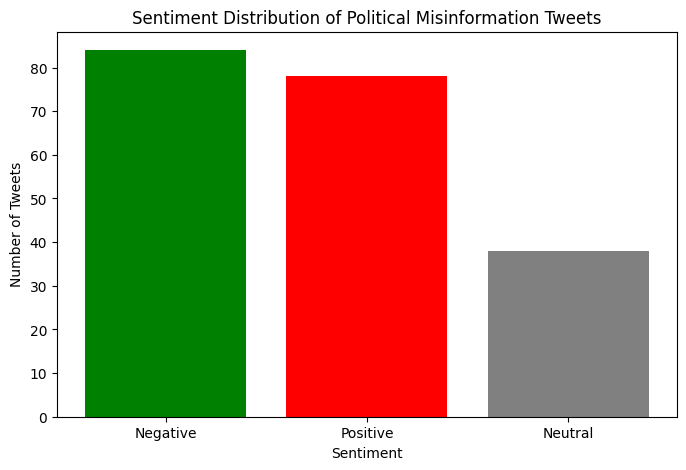

In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

df = pd.read_csv('misinformation_tweets_sample.csv')

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['text'].apply(get_sentiment)

print(df.head())

sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(8,5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution of Political Misinformation Tweets')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daijiayin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


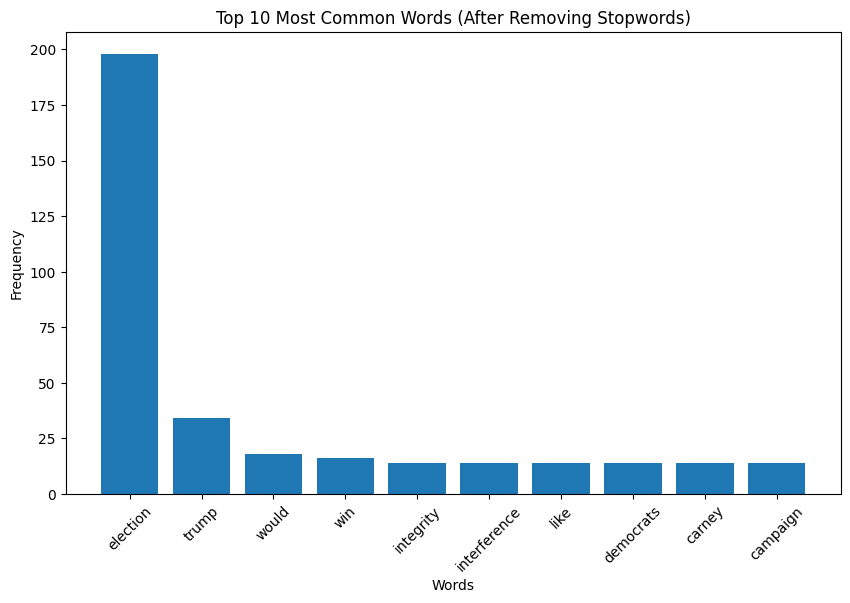

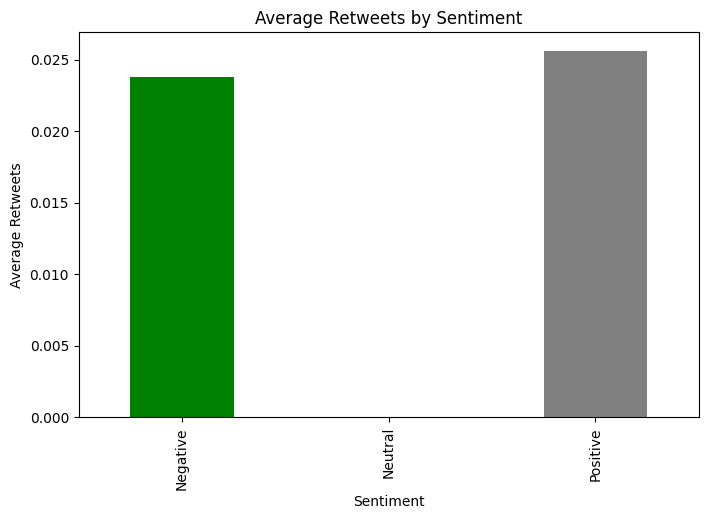

In [3]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove links
    text = re.sub(r'@\w+', '', text)     # remove mentions
    text = re.sub(r'#', '', text)         # remove hashtags symbol
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove special characters
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]  # remove stopwords
    return ' '.join(words)

df['clean_text'] = df['text'].apply(clean_text)

all_words = ' '.join(df['clean_text']).split()
common_words = Counter(all_words).most_common(10)

words, counts = zip(*common_words)
plt.figure(figsize=(10,6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words (After Removing Stopwords)')
plt.xticks(rotation=45)
plt.show()



avg_retweets_per_sentiment = df.groupby('sentiment')['retweets'].mean()

# Plot retweets by sentiment
plt.figure(figsize=(8,5))
avg_retweets_per_sentiment.plot(kind='bar', color=['green', 'red', 'gray'])
plt.ylabel('Average Retweets')
plt.xlabel('Sentiment')
plt.title('Average Retweets by Sentiment')
plt.show()


In [8]:
df.head()

,created_at,text,retweets,likes,sentiment,clean_text
0,2025-04-08 02:09:37+00:00,@AngusTaylorMP Chalmers will mention- the debt...,0,0,Negative,chalmers mention debt inherited liberals want ...
1,2025-04-08 02:09:37+00:00,The journalist wrote a brief news report about...,0,0,Neutral,journalist wrote brief news report local elect...
2,2025-04-08 02:09:36+00:00,@SriReddyTalks What if @YSRCParty wins in the ...,0,0,Positive,wins next election stand words
3,2025-04-08 02:09:36+00:00,@rajagopalan8 @sansbarrier Yes ur puluthi who ...,0,0,Positive,yes ur puluthi knows future vote share annamal...
4,2025-04-08 02:09:34+00:00,This prick is just as corrupt as Trudeau. Also...,0,0,Negative,prick corrupt trudeau also fuck stay election ...
